# Importing NLTK Libraries

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud
from textblob import TextBlob
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pratik.advani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pratik.advani\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Reading Data

In [136]:
lyric=pd.read_csv("D:\Pratik_Data\IMS Lyric Senti Analysis Practice//lyrics.csv")

In [137]:
lyric.head()

,lyrics
0,youre walking taller than you should the air i...
1,bottle eyes glassy blue i watch the rain come ...
2,ten years older than i was what i brought you ...
3,give my jewels to the army my silverware and j...
4,and if you follow me son the window wrap aroun...


# Pre-Processing + Tokenization

In [138]:
lyrics_list=lyric['lyrics'].tolist()

In [139]:
lyrics_list

['youre walking taller than you should the air is thin around your beautiful head youre saying things with your mouth to me that i dont recognize youre aware of yourself lately redefining yourself designing yourself you havent looked at me forever got a diagram of your associations a strategy youre weighing your options what would you trade me for youre measuring me lately and i can tell and i can tell im losing weight youre measuring me lately youre dressing me do not tell me ive changed youre just raising your standards do not give me away i am the same i am the same have you found him have you told him everything does he say he feels bad about all this youve shown tenderness for me tenderness for me to him do not tell me ive changed youre just raising your standards do not give me away i am the same i am the same',
 'bottle eyes glassy blue i watch the rain come out of you sky is white with the flu im terrified of losing you if i go to the sea ill bring you down down with me if i go

# Removing Special Characters

In [140]:
a = str.maketrans('', '', '@#%$^!~`')
lyrics_list=[s.translate(a) for s in lyrics_list]

In [141]:
tokenizer=RegexpTokenizer(r'\w+') #Loading Tokenizer
for i in range(0,len(lyrics_list)):
    tokens[i]=tokenizer.tokenize(lyrics_list[i]) # Applying tokenization
    words=[w.lower() for w in tokens[i]]  #Converting to lower case
    filtered_words=[word for word in words if word not in stopwords.words('english') and len(word)>1] # Removing stopwords

# Plotting Word Cloud

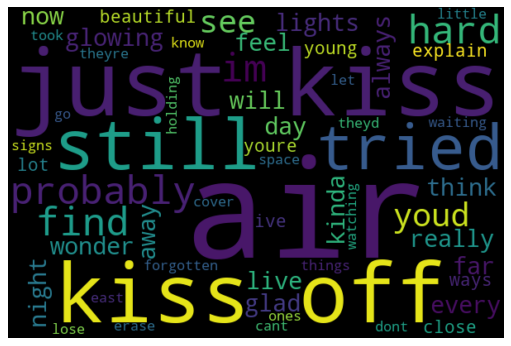

In [160]:
for tokens1 in range(0,len(lyrics_list)):
    wordcloud = WordCloud(max_words = 100, width=600, height=400, background_color="black").generate(lyrics_list[tokens1])
plt.figure(figsize=(8,6), dpi=80)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Sentiment Analysis


General Report: 
Weakly Positive


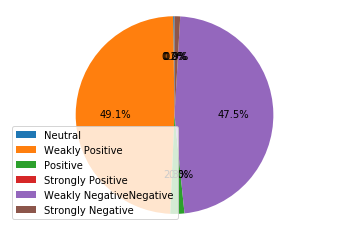

In [168]:
polarity=0
positive=0
negative=0
neutral=0

for lyrics in lyrics_list:
    analysis=TextBlob(lyrics) 
    polarity += analysis.sentiment.polarity  # to find polarity for estimating significance of words for sentiment analysis
    if (analysis.sentiment.polarity == 0): 
                neutral += 1
    elif (analysis.sentiment.polarity > 0 and analysis.sentiment.polarity <= 0.3):
                wpositive += 1
    elif (analysis.sentiment.polarity > 0.3 and analysis.sentiment.polarity <= 0.6):
                positive += 1
    elif (analysis.sentiment.polarity > 0.6 and analysis.sentiment.polarity <= 1):
                spositive += 1
    elif (analysis.sentiment.polarity > -0.3 and analysis.sentiment.polarity <= 0):
                wnegative += 1
    elif (analysis.sentiment.polarity > -0.6 and analysis.sentiment.polarity <= -0.3):
                negative += 1
    elif (analysis.sentiment.polarity > -1 and analysis.sentiment.polarity <= -0.6):
                snegative += 1


            
print()
print("General Report: ")

if (analysis.sentiment.polarity == 0): 
    print("Neutral")
elif (analysis.sentiment.polarity > 0 and analysis.sentiment.polarity <= 0.3):
    print("Weakly Positive")
elif (analysis.sentiment.polarity > 0.3 and analysis.sentiment.polarity <= 0.6):
    print("Positive")
elif (analysis.sentiment.polarity > 0.6 and analysis.sentiment.polarity <= 1):
    print("Strongly Positive")
elif (analysis.sentiment.polarity > -0.3 and analysis.sentiment.polarity <= 0):
    print("Weakly Negative")
elif (analysis.sentiment.polarity > -0.6 and analysis.sentiment.polarity <= -0.3):
    print("Negative")
elif (analysis.sentiment.polarity > -1 and analysis.sentiment.polarity <= -0.6):
    print("Strongly Negative")
            
labels = ['Neutral','Weakly Positive', 'Positive','Strongly Positive', 'Weakly Negative' 'Negative','Strongly Negative']
sizes = [neutral,wpositive,positive,spositive,wnegative,negative,snegative]
#colors = ['yellowgreen','lightgreen', 'gold', 'red','lightsalmon']
patches = plt.pie(sizes,  autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels, loc='best')
plt.show()